# EDA Notebook

Explore text data and metadata.

# Setup

In [1]:
import pandas as pd
import numpy as np
import json
import os
import sys
import matplotlib
import altair as alt

In [2]:
import matplotlib.pyplot as plt

## Check package versions

In [3]:
print('Check package version:')
print('Python: {}'.format(sys.version))
print('pandas: {}'.format(pd.__version__))
print('NumPy: {}'.format(np.__version__))

Check package version:
Python: 3.7.7 (default, Mar 26 2020, 10:32:53) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
pandas: 1.0.3
NumPy: 1.18.1


# Import data

In [4]:
data = list()
meta_path = 'data_files/meta_Video_Games.json'
with open(meta_path) as f:
    for line in f:
        data.append(json.loads(line.strip()))

meta_df = pd.DataFrame(data)

In [5]:
meta_df.head()

,category,title,image,brand,rank,main_cat,asin,description,also_buy,also_view,price,feature,date,tech1,details,similar_item,tech2
0,"[Video Games, PC, Games]",Reversi Sensory Challenger,[https://images-na.ssl-images-amazon.com/image...,Fidelity Electronics,">#2,623,937 in Toys & Games (See Top 100 in To...",Toys & Games,0042000742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[Video Games, Xbox 360, Games, ]",Medal of Honor: Warfighter - Includes Battlefi...,[https://images-na.ssl-images-amazon.com/image...,by\n \n EA Games,">#67,231 in Video Games (See Top 100 in Video ...",Video Games,0078764343,[Brand new sealed!],[B00PADROYW],"[B0050SY5BM, B072NQJCW5, B000TI836G, B002SRSQ7...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[Video Games, Retro Gaming & Microconsoles, Su...",street fighter 2 II turbo super nintendo snes ...,NaN,Nintendo,">#134,433 in Video Games (See Top 100 in Video...",Video Games,0276425316,NaN,NaN,NaN,$0.72,NaN,NaN,NaN,NaN,NaN,NaN
3,"[Video Games, Xbox 360, Accessories, Controlle...",Xbox 360 MAS STICK,[https://images-na.ssl-images-amazon.com/image...,by\n \n MAS SYSTEMS,">#105,263 in Video Games (See Top 100 in Video...",Video Games,0324411812,[MAS's Pro Xbox 360 Stick (Perfect 360 Stick) ...,NaN,NaN,NaN,[Original PCB used from Xbox 360 Control Pad (...,NaN,NaN,NaN,NaN,NaN
4,"[Video Games, PC, Games, , Grades 2-12, Spelli...",Phonics Alive! 3: The Speller,[https://images-na.ssl-images-amazon.com/image...,by\n \n Advanced Software Pty. Ltd.,">#92,397 in Video Games (See Top 100 in Video ...",Video Games,0439335310,"[Phonics Alive! 3, The Speller teaches student...",NaN,[B000BCZ7U0],NaN,"[Grades 2-12, Spelling Program, Teaches Spelli...",NaN,NaN,NaN,NaN,NaN


In [6]:
#metadata_df = pd.read_json('data_files/meta_Video_Games.json')
games_df = pd.read_json('data_files/filtered_games_data.json')
games_df.head()

,overall,reviewText,asin,word_counts
0,1,I used to play this game years ago and loved i...,0439381673,139
1,3,The game itself worked great but the story lin...,0439381673,145
2,4,I had to learn the hard way after ordering thi...,0439381673,447
3,1,The product description should state this clea...,0439381673,157
4,4,I would recommend this learning game for anyon...,0439381673,120


# EDA

In [7]:
games_df.word_counts.describe()

count    1.641515e+06
mean     6.037265e+02
std      9.556648e+02
min      1.010000e+02
25%      1.620000e+02
50%      2.930000e+02
75%      6.340000e+02
max      3.272100e+04
Name: word_counts, dtype: float64

In [8]:
len(games_df[games_df.word_counts > 2000])

90490

In [9]:
90490 / len(games_df)

0.05512590503285075

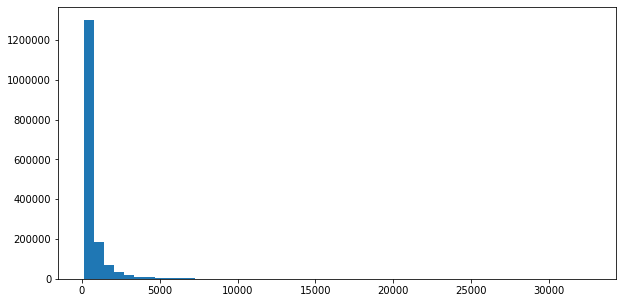

In [10]:
games_df.word_counts.hist(
    grid = False,
    bins = 50,
    figsize=(10,5)
)

Text(0.5, 1.0, 'Histogram of Item Ratings')

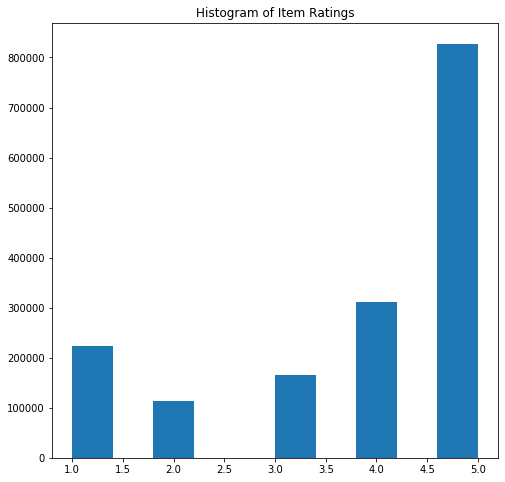

In [25]:
games_df.overall.hist(
    grid=False,
    figsize=(8,8)
)
plt.title('Histogram of Item Ratings')

Text(0.5, 1.0, 'Histogram of Reviews Between 100-2000 Words')

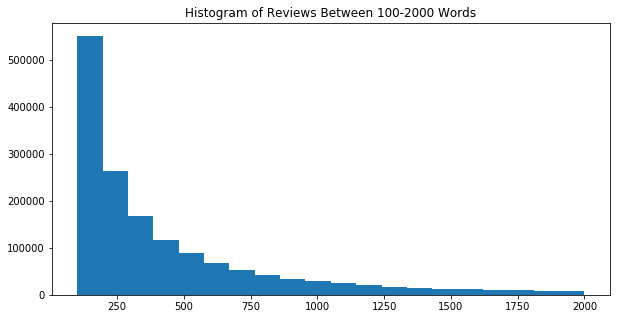

In [37]:
# Remove long reviews and redraw histogram

short_revs_df = games_df[games_df.word_counts <= 2000]
short_revs_df.word_counts.hist(
    grid=False,
    figsize=(10,5),
    bins = 20
)
plt.title('Histogram of Reviews Between 100-2000 Words')

In [36]:
short_revs_df.word_counts.describe()

count    1.551025e+06
mean     4.275758e+02
std      3.888643e+02
min      1.010000e+02
25%      1.570000e+02
50%      2.730000e+02
75%      5.460000e+02
max      2.000000e+03
Name: word_counts, dtype: float64

In [13]:
games_df.overall.value_counts()

5    827649
4    310350
1    223699
3    165419
2    114398
Name: overall, dtype: int64

In [14]:
list(games_df.overall.value_counts().index)

[5, 4, 1, 3, 2]

In [15]:
rating_counts = list(games_df.overall.value_counts())
rating_counts = [round(x / len(games_df),3) for x in rating_counts]

In [16]:
rating_counts

[0.504, 0.189, 0.136, 0.101, 0.07]

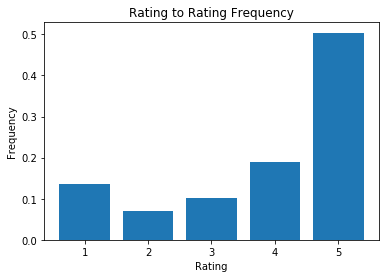

In [26]:
plt.clf()

plt.bar(
    x = [5, 4, 1, 3, 2],
    height = rating_counts
)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating to Rating Frequency')
plt.show()

In [18]:
meta_df.main_cat.unique()

array(['Toys & Games', 'Video Games', 'Books', 'Home Audio & Theater',
       'Computers', 'Software', 'Movies & TV', 'All Electronics', nan,
       'Sports & Outdoors', 'Entertainment', 'Office Products',
       'Arts, Crafts & Sewing', 'Amazon Home', 'Industrial & Scientific',
       'Camera & Photo', 'Cell Phones & Accessories', 'Automotive',
       'Portable Audio & Accessories', 'Car Electronics',
       'Musical Instruments', 'All Beauty', 'Tools & Home Improvement',
       'Baby', 'Grocery', 'GPS & Navigation', 'Health & Personal Care',
       'Pet Supplies', 'Collectible Coins', 'Appliances', 'Gift Cards',
       'Amazon Devices'], dtype=object)

In [19]:
meta_df.main_cat.value_counts()

Video Games                     73504
Computers                        6148
Software                         1764
All Electronics                  1400
Cell Phones & Accessories         424
Toys & Games                      405
Home Audio & Theater              180
Amazon Home                       140
Sports & Outdoors                 133
Office Products                    93
Tools & Home Improvement           89
Books                              71
Industrial & Scientific            55
Health & Personal Care             44
All Beauty                         44
Musical Instruments                42
Movies & TV                        36
Automotive                         33
Camera & Photo                     31
Portable Audio & Accessories       24
Arts, Crafts & Sewing              17
Car Electronics                    11
Baby                               11
Grocery                             7
GPS & Navigation                    6
Pet Supplies                        5
Appliances  

In [20]:
meta_df[meta_df.main_cat == 'Pet Supplies'] # Look into what is being categorized as pet supplies

,category,title,image,brand,rank,main_cat,asin,description,also_buy,also_view,price,feature,date,tech1,details,similar_item,tech2
39161,"[Video Games, Nintendo DS]",Space Invaders Extreme (Nintendo DS),[https://images-na.ssl-images-amazon.com/image...,Vet My Pet,"812,509inPetSupplies(",Pet Supplies,B0019EXU9O,[VetMyPet],NaN,NaN,NaN,"[VetMyPet, VetMyPet, VetMyPet, VetMyPet, VetMy...",NaN,NaN,"\n <div class=""content"">\n\n\n\n\n\n\n<ul...",NaN,NaN
39432,"[Video Games, Wii, Accessories, Faceplates, Pr...",Designer Decal for Nintendo Wii Fit Balance Bo...,[https://images-na.ssl-images-amazon.com/image...,Vet My Pet,"1,230,273inPetSupplies(",Pet Supplies,B001ASB3FC,[VetMyPet],NaN,NaN,NaN,"[VetMyPet, VetMyPet, VetMyPet, VetMyPet, VetMy...",NaN,NaN,"\n <div class=""content"">\n\n\n\n\n\n\n<ul...",NaN,NaN
58193,"[Video Games, Wii, Accessories, Cases & Storage]",New Carrying Case Carry Bag for Nintendo Wii S...,[https://images-na.ssl-images-amazon.com/image...,Sonoran Nutra LLC,"910,977inPetSupplies(",Pet Supplies,B00BLTPEQ4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"\n <div class=""content"">\n\n\n\n\n\n\n<ul...",NaN,NaN
78758,"[Video Games, PC, Accessories, Gaming Mice]","YAMAY Gaming Mouse, USB Corded Mouse Wired Opt...",[https://images-na.ssl-images-amazon.com/image...,YAMAY,"715,442inPetSupplies(",Pet Supplies,B0179GL8OE,[Product Description: Color: Black Lighting Co...,NaN,NaN,NaN,[DPI: 800/1200/1600/2400DPI;( 4 Speed ) Item C...,NaN,NaN,"\n <div class=""content"">\n\n\n\n\n\n\n<ul...",NaN,NaN
80448,"[Video Games, PC, Accessories, Gaming Keyboards]",Sades K10 USB Mechanical Gaming Keyboard LED B...,[https://images-na.ssl-images-amazon.com/image...,Sades,"418,953inPetSupplies(",Pet Supplies,B01A73ZQA8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"\n <div class=""content"">\n\n\n\n\n\n\n<ul...",NaN,NaN


In [21]:
meta_df[meta_df.main_cat == 'Automotive']

,category,title,image,brand,rank,main_cat,asin,description,also_buy,also_view,price,feature,date,tech1,details,similar_item,tech2
27976,"[Video Games, Accessories]",Vector Game Power Video Game Mobile Power System,NaN,Vector,">#6,635,254 in Automotive (See top 100)>#151,0...",Automotive,B0009FUUGU,NaN,NaN,NaN,NaN,NaN,"April 18, 2005",NaN,NaN,NaN,NaN
31577,"[Video Games, PC]",Pippa Funnell - Stud Farm Inheritance,NaN,Focus Multimedia Ltd,">#1,286,051 in Automotive (See top 100)>#19,29...",Automotive,B000FUHVSO,[Platform: WINDOWS 98/ME/2000/XP Publisher: ...,"[B000QGKHCY, B001F50TA0]","[B000ANB7NQ, B001F50TA0]",NaN,NaN,"October 2, 2001","{'Brand': 'Focus Multimedia Ltd', 'Item Weight...",NaN,NaN,NaN
33529,"[Video Games, Xbox 360, Accessories, Cables & ...",Component HD AV Cable X360,[https://images-na.ssl-images-amazon.com/image...,Microsoft,">#837,104 in Automotive (See top 100)>#140 in ...",Automotive,B000L7VH68,[MODEL- B4V-00004 VENDOR- MICROSOFT FEATURES-...,NaN,NaN,$2.99,[Component HD AV Cable X360],"June 4, 2007","{'Brand': 'Microsoft', 'Item Weight': '10.4 ou...",NaN,NaN,NaN
37834,"[Video Games, Accessories]",SILVER SOFT POUCH CARRY CASE BAG GLOVE FOR SON...,NaN,Z-CREATION,">#6,580,322 in Automotive (See top 100)>#150,2...",Automotive,B0012YRTCU,NaN,NaN,NaN,NaN,NaN,"January 23, 2008",NaN,NaN,NaN,NaN
37836,"[Video Games, Xbox 360, Accessories]",XBOX 360 DVD Wireless Remote,NaN,Z-CREATION,">#2,928,857 in Automotive (See top 100)>#4,650...",Automotive,B0012YVFN4,NaN,NaN,[B005FMLZQQ],NaN,NaN,"January 23, 2008",NaN,NaN,NaN,NaN
38357,"[Video Games, Accessories]",PSP 2000 SLIM BLACK COLOR EARPHONES HEADSET HE...,NaN,Z-CREATION,">#6,888,127 in Automotive (See top 100)>#155,6...",Automotive,B0015NJX7C,NaN,NaN,NaN,NaN,NaN,"September 6, 2008",NaN,NaN,NaN,NaN
38521,"[Video Games, PC]",Tank Battle,NaN,CASUALARCADE GAMES,">#4,429,199 in Automotive (See top 100)>#40,88...",Automotive,B00164E8TS,[Platform: WINDOWS 98/ME/XP Publisher: CASUA...,NaN,NaN,$2.95,[Enemy tanks have broken the lines and capture...,"September 10, 2007","{'Brand': 'CASUALARCADE GAMES', 'Item Weight':...",NaN,NaN,NaN
38786,"[Video Games, Accessories]",PSP 2000 SLIM 2IN1 REPLACEMENT BATTERY COVER C...,NaN,Z-CREATION,">#6,339,966 in Automotive (See top 100)>#146,4...",Automotive,B0017IJ7HG,NaN,NaN,NaN,NaN,NaN,"April 8, 2008",NaN,NaN,NaN,NaN
43703,"[Video Games, Xbox 360, Accessories, Faceplate...",var aPageStart = (new Date()).getTime();\nvar ...,[https://images-na.ssl-images-amazon.com/image...,MightySkins,">#1,401,251 in Automotive (See Top 100 in Auto...",Automotive,B0027YLDQW,"[, Do You Want Your GUITAR HERO GUITAR HERO To...",NaN,"[B00289FQE6, B002897SQ0, B003EMN1RA, B00289PD8...",$9.99,[SET THE TREND: Show off your unique style wit...,"April 28, 2009",NaN,NaN,NaN,NaN
45041,"[Video Games, Accessories]",var aPageStart = (new Date()).getTime();\nvar ...,[https://images-na.ssl-images-amazon.com/image...,Hardline Products,">#1,080,083 in Automotive (See top 100)>#45,83...",Automotive,B002LGOABQ,[The Moto-Slide from Hardline Products offers ...,NaN,"[B005GK23SQ, B006ZB8SCK, B00QCVZBA0, B01BKNXJ7...",NaN,"[Works on any motorcycle, easy roll on, roll o...","May 31, 2007","{'Brand': 'Hardline Products', 'Model': 'Motos...",NaN,NaN,NaN


In [22]:
len(meta_df.title.unique()) # number of unique titles

68764

In [29]:
meta_df.iloc[51791].title

'90-93 Toyota MR2 NRG 350MM Steering Wheel + Hub + Quick Release Black'

In [30]:
meta_df[meta_df.main_cat == 'Software'].head(n=20)

,category,title,image,brand,rank,main_cat,asin,description,also_buy,also_view,price,feature,date,tech1,details,similar_item,tech2
81,"[Video Games, PC, Games]",Turok (PC),[https://images-na.ssl-images-amazon.com/image...,Akklaim,NaN,Software,1888449543,[This is one of a handful of classic PC games ...,[B00002SFL4],"[B000Y5DTJK, B00002STGR, B00002SFL4]",NaN,"[1st person shooter, with dinosaurs as your ma...",NaN,NaN,NaN,NaN,NaN
88,"[Video Games, PC, Games]",World of Mahjongg,[https://images-na.ssl-images-amazon.com/image...,Viva Media,NaN,Software,3815864844,[Experience a vast new 3D world of Mahjongg li...,NaN,NaN,NaN,[1 Million+ Professionally Created Layouts to ...,NaN,NaN,NaN,NaN,NaN
91,"[Video Games, PC, Games]",Deep Fritz 12 Multi-Processor Version,[https://images-na.ssl-images-amazon.com/image...,Deep Fritz 14,NaN,Software,3866811659,[DEEP FRITZ is now even faster. The completely...,NaN,NaN,NaN,"[Completely redesigned ergonomic interface, Tw...",NaN,NaN,NaN,NaN,NaN
94,"[Video Games, PC, Games]",ChessBase 12 Starter Pack,[https://images-na.ssl-images-amazon.com/image...,ChessBase,NaN,Software,3866813465,[A short list of some of the new features in ...,NaN,NaN,NaN,"[Now shipping!, Access to Player encyclopedia ...",NaN,NaN,NaN,NaN,NaN
95,"[Video Games, PC, Games]",Fritz 16 Chess Software,[https://images-na.ssl-images-amazon.com/image...,ChessBase,NaN,Software,3866816316,[When Is Chess The Most Enjoyable? When You Wi...,"[1890085103, 9056916823, 0713484640, 184994434...","[B07956LVKK, B076VV2WV3, B00023XXMM, B01EX7HHP...",$69.95,"[Compatible With Windows 10, Installs On Up to...",NaN,NaN,NaN,NaN,NaN
125,"[Video Games, PC]",Battlefield Bad Company 2 Limited Edition,[https://images-na.ssl-images-amazon.com/image...,Battlefield Bad Company 2 Limited Edition,NaN,Software,8990289440,[The Limited Edition game features six special...,NaN,"[B0049HQB9Y, B00CEKMYK8, B002NIP2SM]",NaN,NaN,NaN,NaN,"\n <div class=""content"">\n\n\n\n\n\n\n\n<ul>\...",NaN,NaN
126,"[Video Games, PC, Games]",Toy Story Mania!,[https://images-na.ssl-images-amazon.com/image...,Toy Story,NaN,Software,8990289424,"[Inspired by the Disney/Pixar feature film, To...",NaN,"[B0026IUSXI, B0039Q5R5A]",NaN,[Engage in 10 fast-paced shooting galleries - ...,NaN,NaN,"\n <div class=""content"">\n\n\n\n\n\n\n\n<ul>\...",NaN,NaN
387,"[Video Games, PC, , The Cat is Back! Product ...",Dr. Seuss Cat in the Hat - PC/Mac (Jewel case),NaN,by\n \n The Learning Company,">#2,529 in Video Games > Mac Games>#16,950 in ...",Software,B00000JLAE,[The Cat In The Hat comes to life in your hous...,"[B00000JLAJ, B0003CIVZG, B00000JLAC]",[B00005IB4V],NaN,[The Cat is Back! Product InformationWith thi...,NaN,NaN,NaN,NaN,NaN
494,"[Video Games, PC, Games]",Trivial Pursuit: Nascar Edition,[https://images-na.ssl-images-amazon.com/image...,Hasbro Interactive,NaN,Software,B00000K4EF,[Hasbro Interactive is the first company to de...,NaN,NaN,NaN,NaN,NaN,NaN,"\n <div class=""content"">\n\n\n\n\n\n\n\n<ul>\...",NaN,NaN
607,"[Video Games, PC, Games]",Austin Powers: Operation Trivia,[https://images-na.ssl-images-amazon.com/image...,Sierra On-Line,NaN,Software,B00001KWS2,[Amazon.com This pop culture trivia game is s...,NaN,NaN,$49.99,[Austin Powers: Operation Trivia],NaN,NaN,"\n <div class=""content"">\n\n\n\n\n\n\n\n<ul>\...",NaN,NaN


In [32]:
meta_df[meta_df.main_cat == 'Movies & TV'].head(n=20)

,category,title,image,brand,rank,main_cat,asin,description,also_buy,also_view,price,feature,date,tech1,details,similar_item,tech2
92,"[Video Games, PC, Games]",Komodo Chess 8 - Multiprocessor version,[https://images-na.ssl-images-amazon.com/image...,Learn more,"297,050inMoviesamp;TV(",Movies & TV,3866814429,[Komodo is a chess program that is different f...,NaN,[B00023XXMM],NaN,NaN,NaN,NaN,NaN,NaN,NaN
4559,"[Video Games, Retro Gaming & Microconsoles, 3DO]",Battle Chess UMD for PSP,NaN,NaN,"1,008,154inMoviesamp;TV(",Movies & TV,B00004SW2W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"\n <div class=""content"">\n\n\n\n\n\n\n<ul...",NaN,NaN
5190,"[Video Games, Retro Gaming & Microconsoles, Se...",Sega Dreamcast Sports Pack,[https://images-na.ssl-images-amazon.com/image...,NaN,"401,428inMoviesTV(",Movies & TV,B00004W4YB,[The system's processor is a 200 MHz SH-4 with...,NaN,"[B07KPN1SM7, B004EBMFVS, B00000K2R4, B019GDTZM...",NaN,NaN,NaN,NaN,"\n <div class=""content"">\n\n\n\n\n\n\n<ul...",NaN,NaN
11173,"[Video Games, Retro Gaming & Microconsoles, Xb...",XBox Holiday Bundle includes Star Wars Clone W...,[https://images-na.ssl-images-amazon.com/image...,NaN,"376,293inMoviesamp;TV(",Movies & TV,B0000DE6PX,[Star Wars: The Clone Wars: It starts where St...,NaN,NaN,NaN,NaN,NaN,NaN,"\n <div class=""content"">\n\n\n\n\n\n\n<ul...",NaN,NaN
11318,"[Video Games, PC, Games]",Crime Fighter 3pk,[https://images-na.ssl-images-amazon.com/image...,NaN,"893,930inMoviesamp;TV(",Movies & TV,B0000VYKVE,[CRIME FIGHTER 3 PACK (CRIME PATROL/JOHNNY ROC...,NaN,NaN,NaN,NaN,NaN,NaN,"\n <div class=""content"">\n\n\n\n\n\n\n<ul...",NaN,NaN
12439,"[Video Games, PC]",E3 Access 2004: The Future Of Video Games,NaN,NaN,"390,890inMoviesTV(",Movies & TV,B0002DRHWO,[E3 ACCESS: The Future of Videogames 4-Disc se...,NaN,[B000AQJ54Q],$7.99,NaN,NaN,NaN,"\n <div class=""content"">\n\n\n\n\n\n\n<ul...",NaN,NaN
17468,"[Video Games, Retro Gaming & Microconsoles, 3DO]",Battle Chess UMD for PSP,NaN,NaN,"1,008,154inMoviesamp;TV(",Movies & TV,B00004SW2W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"\n <div class=""content"">\n\n\n\n\n\n\n<ul...",NaN,NaN
18099,"[Video Games, Retro Gaming & Microconsoles, Se...",Sega Dreamcast Sports Pack,[https://images-na.ssl-images-amazon.com/image...,NaN,"401,428inMoviesTV(",Movies & TV,B00004W4YB,[The system's processor is a 200 MHz SH-4 with...,NaN,"[B07KPN1SM7, B004EBMFVS, B00000K2R4, B019GDTZM...",NaN,NaN,NaN,NaN,"\n <div class=""content"">\n\n\n\n\n\n\n<ul...",NaN,NaN
24082,"[Video Games, Retro Gaming & Microconsoles, Xb...",XBox Holiday Bundle includes Star Wars Clone W...,[https://images-na.ssl-images-amazon.com/image...,NaN,"376,293inMoviesamp;TV(",Movies & TV,B0000DE6PX,[Star Wars: The Clone Wars: It starts where St...,NaN,NaN,NaN,NaN,NaN,NaN,"\n <div class=""content"">\n\n\n\n\n\n\n<ul...",NaN,NaN
24227,"[Video Games, PC, Games]",Crime Fighter 3pk,[https://images-na.ssl-images-amazon.com/image...,NaN,"893,930inMoviesamp;TV(",Movies & TV,B0000VYKVE,[CRIME FIGHTER 3 PACK (CRIME PATROL/JOHNNY ROC...,NaN,NaN,NaN,NaN,NaN,NaN,"\n <div class=""content"">\n\n\n\n\n\n\n<ul...",NaN,NaN


In [31]:
meta_df[meta_df.main_cat == 'Computers'].head(n=20)

,category,title,image,brand,rank,main_cat,asin,description,also_buy,also_view,price,feature,date,tech1,details,similar_item,tech2
67,"[Video Games, PC, Accessories]",Preschool Edge: 10 Educational Titles on 10 CDs,[https://images-na.ssl-images-amazon.com/image...,Brighter Child,">#9,360 in Video Games > PC Games > PC Game Ha...",Computers,1577911989,"[, An educational learning kit sure to be a hi...",NaN,NaN,NaN,NaN,"July 16, 2007",NaN,NaN,NaN,NaN
86,"[Video Games, Accessories]",Axis Zombies - Blutfreuz Korps Untertoten Squad,NaN,Dust Tactics,">#108,111 in Computers & Accessories (See top ...",Computers,1940825164,[Axis Zombies - Blutfreuz Korps Untertoten Squ...,NaN,NaN,NaN,NaN,"June 11, 2014","{'Brand Name': 'Dust Tactics', 'Item Weight': ...",NaN,NaN,NaN
116,"[Video Games, Wii U]",YTTL® New Touch Screen Repair Replacement Part...,NaN,YTTL,">#17,659 in Computers & Accessories (See top 1...",Computers,7544256944,[This Replacement touch screen digitizer is us...,NaN,"[B0718WWNP8, B00WFUQZMK, B00IIESBV0, B0150RTQ52]",$11.99,"[WII U touth screen, wii u screen, wii u touch...","July 8, 2013","{'Brand Name': 'YTTL', 'Hardware Platform': 'W...",NaN,NaN,NaN
133,"[Video Games, Accessories]",Lamentations of The Flame Princess LFP1003 Pla...,[https://images-na.ssl-images-amazon.com/image...,James Raggi,">#4,673 in Computers & Accessories (See top 10...",Computers,952590444X,"[Beyond the veil of reality, beyond the influe...",NaN,"[9525904873, 9525904601, 1503334945, 952590424...",$19.45,[This book is a revision of the Rules & Magic ...,"June 12, 2014","{'Brand Name': 'James Raggi', 'Series': 'Lamen...",NaN,NaN,NaN
138,"[Video Games, Nintendo DS, Accessories, Cases ...",DSi XL Alunminum Metallic Armor Hard Case XL w...,[https://images-na.ssl-images-amazon.com/image...,MYCARRYINGCASE,">#704,679 in Electronics (See Top 100 in Elect...",Computers,9625992480,NaN,NaN,NaN,NaN,NaN,"September 8, 2012",NaN,NaN,NaN,NaN
139,"[Video Games, Nintendo DS, Accessories, Cases ...",DSi XL Alunminum Metallic Armor Hard Case XL w...,[https://images-na.ssl-images-amazon.com/image...,MYCARRYINGCASE,">#765,645 in Electronics (See Top 100 in Elect...",Computers,9625992421,NaN,NaN,NaN,NaN,NaN,"September 8, 2012",NaN,NaN,NaN,NaN
146,"[Video Games, Accessories]",256MB Memory Card compatible for Wii & Gamecub...,NaN,Mycarryingcase,">#925,115 in Electronics (See Top 100 in Elect...",Computers,9628887491,[* 256MB 2043 blocks of memory * For Wii / Gam...,NaN,NaN,NaN,NaN,"March 12, 2008",NaN,NaN,NaN,NaN
149,"[Video Games, Retro Gaming & Microconsoles, Pl...",Dotop Sony Playstation 2 PS2 64MB Memory Card,[https://images-na.ssl-images-amazon.com/image...,Dotop,">#66,157 in Electronics (See Top 100 in Electr...",Computers,9629971372,[This is Memory Card 128MB for PlayStation 2 P...,"[B01LY4QRT8, B0000C7GHG, B00004SQPD, B000SEU92...",NaN,$9.90,[brand new],"June 16, 2008",NaN,NaN,NaN,NaN
187,"[Video Games, Nintendo DS, Accessories]",DSi XL Alunminum Metallic Armor Hard Case XL w...,[https://images-na.ssl-images-amazon.com/image...,Mycarryingcase,">#779,873 in Electronics (See Top 100 in Elect...",Computers,9862511095,[Nintendo DSi XL case to protect your Dsi XL f...,NaN,NaN,NaN,[The combination of the crystal texture and co...,"March 9, 2010",NaN,NaN,NaN,NaN
188,"[Video Games, Retro Gaming & Microconsoles, Pl...",Audio Video RCA Composite AV Video Game Select...,[https://images-na.ssl-images-amazon.com/image...,Mycarryingcase,">#10,460 in Computers & Accessories (See top 1...",Computers,9867299434,[This is a 3 to 1 Composite AV Signal Switch w...,NaN,"[B00HNCPR92, B00TKUE18S, B0006TIA7K, B07BK1CDP...",$5.69,[Color coded connectors help to simplify insta...,"October 8, 2009","{'Brand Name': 'Mycarryingcase', 'Hardware Pla...",NaN,NaN,NaN


In [33]:
meta_df[meta_df.main_cat == 'Office Products'].head(n=15)

,category,title,image,brand,rank,main_cat,asin,description,also_buy,also_view,price,feature,date,tech1,details,similar_item,tech2
7864,"[Video Games, Retro Gaming & Microconsoles, Xb...",Red Card 2003,NaN,Midway,">#561,638 in Office Products (See top 100)>#92...",Office Products,B0000664JI,"[A football game in a truly arcade style, Midw...",NaN,NaN,NaN,"[Plays on Xbox platform, soccer]","April 5, 2002","{'Brand Name': 'Midway', 'Item Weight': '8 oun...",NaN,NaN,NaN
11430,"[Video Games, Retro Gaming & Microconsoles, Ga...",Cobalt Pro Gamer'z Kit GBA,[https://images-na.ssl-images-amazon.com/image...,Intec,">#1,433,091 in Office Products (See top 100)>#...",Office Products,B000139QXI,[GBA Pro Gamer'z Kit comes in an ultimate alum...,NaN,NaN,NaN,"[Earphones link and game links, Safe screen an...","November 17, 2005","{'Item Weight': '2.8 pounds', 'Product Dimensi...",NaN,NaN,NaN
12360,"[Video Games, PC, Games]",Serious Sam - The Second Encounter,NaN,Gathering of Developers,">#957,972 in Office Products (See top 100)>#29...",Office Products,B0002BQRGS,[Sequel to Serious Same PC Game of the Year!Pr...,NaN,NaN,$2.50,NaN,"February 24, 2005","{'Brand Name': 'Gathering of Developers', 'Ite...",NaN,NaN,NaN
20773,"[Video Games, Retro Gaming & Microconsoles, Xb...",Red Card 2003,NaN,Midway,">#561,638 in Office Products (See top 100)>#92...",Office Products,B0000664JI,"[A football game in a truly arcade style, Midw...",NaN,NaN,NaN,"[Plays on Xbox platform, soccer]","April 5, 2002","{'Brand Name': 'Midway', 'Item Weight': '8 oun...",NaN,NaN,NaN
24339,"[Video Games, Retro Gaming & Microconsoles, Ga...",Cobalt Pro Gamer'z Kit GBA,[https://images-na.ssl-images-amazon.com/image...,Intec,">#1,433,091 in Office Products (See top 100)>#...",Office Products,B000139QXI,[GBA Pro Gamer'z Kit comes in an ultimate alum...,NaN,NaN,NaN,"[Earphones link and game links, Safe screen an...","November 17, 2005","{'Item Weight': '2.8 pounds', 'Product Dimensi...",NaN,NaN,NaN
25269,"[Video Games, PC, Games]",Serious Sam - The Second Encounter,NaN,Gathering of Developers,">#957,972 in Office Products (See top 100)>#29...",Office Products,B0002BQRGS,[Sequel to Serious Same PC Game of the Year!Pr...,NaN,NaN,$2.50,NaN,"February 24, 2005","{'Brand Name': 'Gathering of Developers', 'Ite...",NaN,NaN,NaN
29428,"[Video Games, PC, Games]",Empire Earth 2,NaN,EMPIRE,">#1,299,963 in Office Products (See top 100)>#...",Office Products,B000B91JQE,[Empire Earth 2 builds upon the success of its...,NaN,"[B0001XOJAS, B000083JX6]",NaN,NaN,"September 2, 2005","{'Brand Name': 'EMPIRE', 'Item Weight': '3.2 o...",NaN,NaN,NaN
30131,"[Video Games, PC, Games]",Marine Aquarium 1.5: Virtual Undersea Paradise,[https://images-na.ssl-images-amazon.com/image...,Encore,">#325,532 in Office Products (See top 100)>#11...",Office Products,B000CFMQPK,[Select from 10 stunning fish species!Product ...,NaN,"[B002QAP4OE, 9089701036]",$8.79,"[Computer Software - Marine Aquarium, A Virtua...","October 2, 2001","{'Brand Name': 'Encore', 'Item Weight': '2.4 o...",NaN,NaN,NaN
31517,"[Video Games, PC]",Paul Cezanne: Art Tours Interactive Guides,[https://images-na.ssl-images-amazon.com/image...,Global Software Publishing,">#1,856,147 in Office Products (See top 100)>#...",Office Products,B000FS6ZVU,[Interactive Guides to the Worlds Finest ArtCo...,NaN,NaN,NaN,[PAUL CEZANNE ART TOURS],"May 17, 2006","{'Brand Name': 'Global Software Publishing', '...",NaN,NaN,NaN
35771,"[Video Games, PC, Games]","Arthur""s Pet Chase",NaN,Broderbund,">#1,617,236 in Office Products (See top 100)>#...",Office Products,B000TG514K,[Help Arthur bring back the lost pets!Product ...,NaN,NaN,$15.88,[Arthur's Pet Chase],"July 9, 2007","{'Brand Name': 'Broderbund', 'Item Weight': '3...",NaN,NaN,NaN


In [39]:
meta_df.iloc[43703].title # Some titles have messed up titles, probably from scraping anomalies

: url(https://images-na.ssl-images-amazon.com/images/G/01/common/sprites/sprite-communities._CB320811603_.png); background-repeat: no-repeat; }\n\n/* Different sprites/images used CSS End */\n\n\n\n/* Best Seller Badging */\n.simsWrapper .shoveler ul { height: 220px;}\n\n\n  .medSprite { background-image: url(\'https://images-na.ssl-images-amazon.com/images/G/01/common/sprites/sprite-media-platform._CB247725847_.png\'); background-repeat: no-repeat; }\n\n\n\n<!--\nfunction amz_js_PopWin(url,name,options){\n  var ContextWindow = window.open(url,name,options);\n  ContextWindow.focus();\n  return false;\n}\n//-->\n\n\n\n\n\n\nAmazon.com: MightySkins Skin For GUITAR HERO GUITAR HERO - Dragon Fantasy | Protective, Durable, and Unique Vinyl Decal wrap cover | Easy To Apply, Remove, and Change Styles | Made in the USA: Automotive\n\n\n\n// =============================================================================\n// Function Class: Show/Hide product promotions & special offers link\n// ==

# Export dataset

In [34]:
# Export only reviews between 100-2000 words
short_revs_df.to_pickle('data_files/short_reviews.pkl')

In [35]:
len(short_revs_df)

1551025